# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of why 20% of patients didn't show up to their appointment. A number of characteristics about the patient are included in each row.


In [1]:
# importing the needed packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
# importing the appointement dataset:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')



<a id='wrangling'></a>
## Data Wrangling



### Data assessing:


In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [4]:

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df['AppointmentID'].duplicated().sum()

0

### Data assessing summary:
###### -We can notice that all the data is non-null and that is good, but in terms of uniqueness we can notice that patientID we do have some duplicate, probably some patient has more than one appointment.
###### -Also in the handicap column we must have only 2 values but we have 5.
###### -Too I'm going to rename the No-show column to no_show.
###### -And I'm going to change the type of both dates columns to DateTime.
###### -The described attribute showed that we have a -1 as the minimum in the age column, so we are going to drop the corresponding row or rows.
###### Drop the PatientId and AppointmentID because we will not work with them.


### Data Cleaning:
###### After discussing the data structure and its issues, the next step is cleaning it.

In [8]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df = df.rename(columns={'No-show': 'no_show'})
df.drop(index=99832, inplace=True)
updated = df['Handcap'] > 1
df.loc[updated, 'Handcap'] = 1
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [9]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  no_show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [34]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,waited_days
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934,10.183975
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445,15.254914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


### Data augmenting:
######  1-Adding the day of appointment as a factor to analyze, so I'm going to add it in a new column called dayoftheweek.


In [11]:
df['dayoftheweek'] = df['ScheduledDay'].dt.day_name()


###### 2-Adding the waited _days column, it is the difference in days between the ScheduledDay and AppointmentDay.


In [12]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date
df['difference_in_days'] = abs(df['AppointmentDay'] - df['ScheduledDay'])
df['difference_in_days'] = df.difference_in_days.astype(str)
df[['waited_days', 'days']] = df['difference_in_days'].str.split(' ', 1, expand=True)

In [13]:
df.drop(['difference_in_days', 'days'], axis=1, inplace=True)

In [14]:
df["waited_days"] = df["waited_days"].astype(str).astype(int)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110526 non-null  object
 1   ScheduledDay    110526 non-null  object
 2   AppointmentDay  110526 non-null  object
 3   Age             110526 non-null  int64 
 4   Neighbourhood   110526 non-null  object
 5   Scholarship     110526 non-null  int64 
 6   Hipertension    110526 non-null  int64 
 7   Diabetes        110526 non-null  int64 
 8   Alcoholism      110526 non-null  int64 
 9   Handcap         110526 non-null  int64 
 10  SMS_received    110526 non-null  int64 
 11  no_show         110526 non-null  object
 12  dayoftheweek    110526 non-null  object
 13  waited_days     110526 non-null  int32 
dtypes: int32(1), int64(7), object(6)
memory usage: 12.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

The first step that i will take is give us a bird eye view by drowing a correlation heatmap and histogram, but before this, i will numerize the columns that has an object type.



In [16]:
# first thing we will do is numerize the whole data set( gender, neighbourhood, dayoftheweek...) in order to correlatre between variables
df2 = df.copy()
df_numerized = df2
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtypes == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

        
df_numerized.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,dayoftheweek,waited_days
0,0,81,0,62,39,0,1,0,0,0,0,0,0,0
1,1,81,0,56,39,0,0,0,0,0,0,0,0,0
2,0,81,0,62,45,0,0,0,0,0,0,0,0,0
3,0,81,0,8,54,0,0,0,0,0,0,0,0,0
4,0,81,0,56,39,0,1,1,0,0,0,0,0,0


In [17]:
# here we correlate between the whole variables
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
# this code is made to show us the max of rows
pd.set_option('display.max_rows', None)
sorted_pairs.sort_values(ascending = False)

waited_days     waited_days       1.000000
Hipertension    Hipertension      1.000000
Gender          Gender            1.000000
no_show         no_show           1.000000
SMS_received    SMS_received      1.000000
Alcoholism      Alcoholism        1.000000
Diabetes        Diabetes          1.000000
Handcap         Handcap           1.000000
Scholarship     Scholarship       1.000000
Neighbourhood   Neighbourhood     1.000000
Age             Age               1.000000
AppointmentDay  AppointmentDay    1.000000
ScheduledDay    ScheduledDay      1.000000
dayoftheweek    dayoftheweek      1.000000
ScheduledDay    AppointmentDay    0.607864
AppointmentDay  ScheduledDay      0.607864
Hipertension    Age               0.504586
Age             Hipertension      0.504586
Diabetes        Hipertension      0.433085
Hipertension    Diabetes          0.433085
waited_days     SMS_received      0.398138
SMS_received    waited_days       0.398138
Age             Diabetes          0.292391
Diabetes   

### Insight: 
There is a low correlation of 0.398138 between the waited days and SMS received, and also a very low correlation of 0.186253 between the waited days and no show.


### Question: Does age has an impact on respecting the appointement?

In [18]:
#First i will create soe masks for this.
showed = df_numerized.no_show == 0
notshowed = df_numerized.no_show == 1


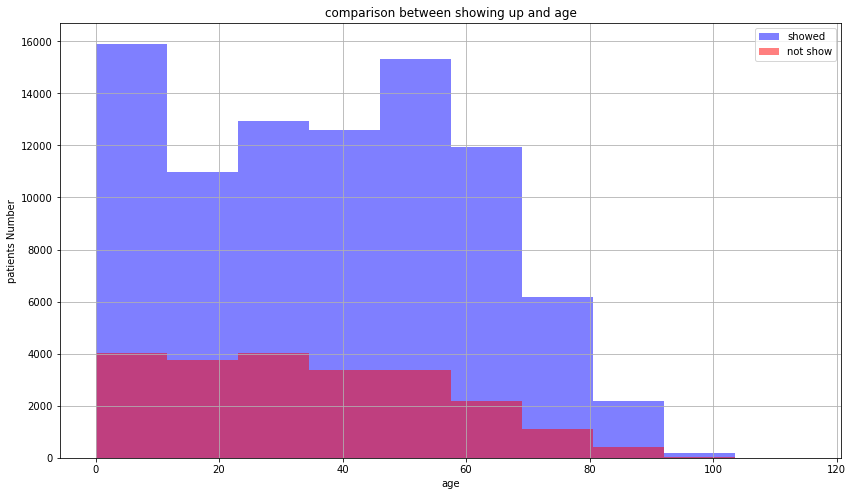

In [19]:
def showing_up(df,col_name,showed,notshowed): #settings
    plt.figure(figsize=[14,8])
    df[col_name][showed].hist(alpha=0.5,bins=10,color='blue',label='showed')
    df[col_name][notshowed].hist(alpha=0.5,bins=10,color='red',label='not show')
    plt.legend();
    plt.title('comparison between showing up and age')
    plt.xlabel('age')
    plt.ylabel('patients Number');
showing_up(df,'Age',showed,notshowed)

In [20]:
df.Age[showed].median() - df.Age[notshowed].median()

5.0

### Insight: 
well, these results are not really saying that much just that 50% of the time people that showed up are older than the people that didn't show up by only 5 years.

### Question: Does SMS has an impact on respecting the appointement?

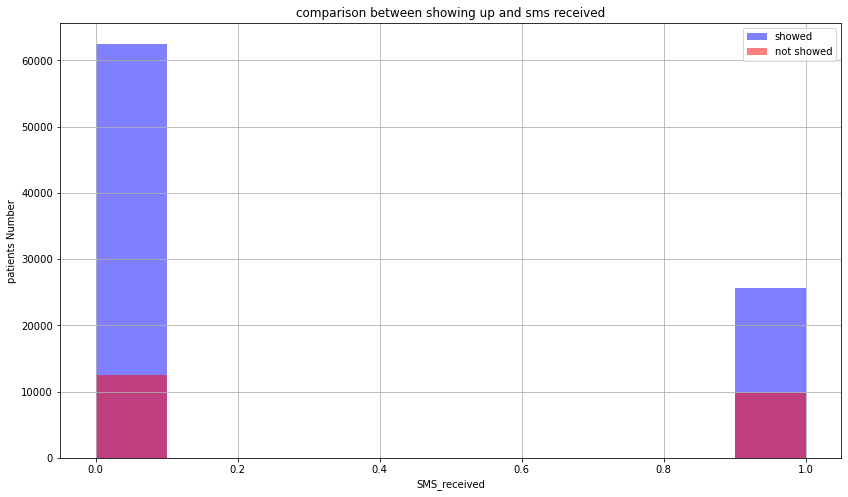

In [21]:
def showing_up(df,col_name,showed,notshowed): #settings
    plt.figure(figsize=[14,8])
    df[col_name][showed].hist(alpha=0.5,bins=10,color='blue',label='showed')
    df[col_name][notshowed].hist(alpha=0.5,bins=10,color='red',label='not showed')
    plt.legend();
    plt.title('comparison between showing up and sms received')
    plt.xlabel('SMS_received')
    plt.ylabel('patients Number');
showing_up(df,'SMS_received',showed,notshowed)

In [22]:
df.SMS_received[showed].mean() , df.SMS_received[notshowed].mean()

(0.29133742220005215, 0.43837089475334917)

In [23]:
df.SMS_received.mean()

0.3210285362720084

### Insight: 
well, that says that only 32% of people received an SMS as a reminder about the appointment but the irony is people who showed up only 29% of them received the SMS, contrary to people that didn't show that 43% of them received the SMS.

### Question: Does the day of the week has an impact on respecting the appointement?

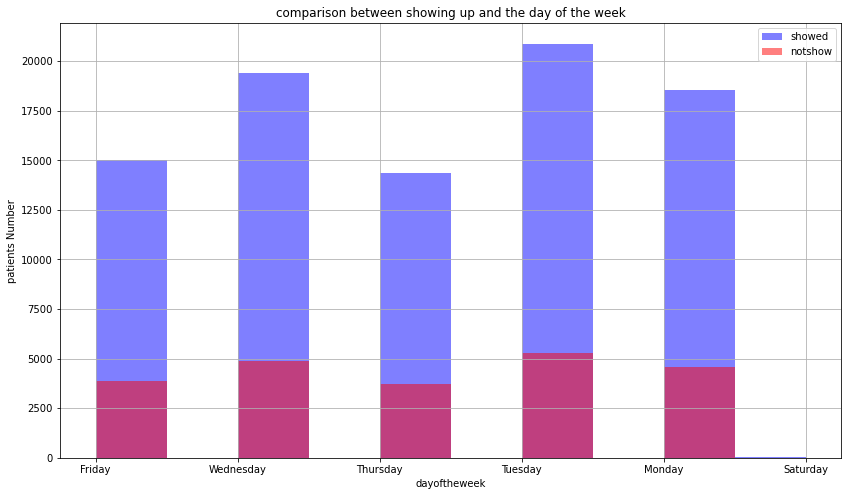

In [24]:
def showing_up(df,col_name,showed,notshowed): #settings
    plt.figure(figsize=[14,8])
    df[col_name][showed].hist(alpha=0.5,bins=10,color='blue',label='showed')
    df[col_name][notshowed].hist(alpha=0.5,bins=10,color='red',label='notshow')
    plt.legend();
    plt.title('comparison between showing up and the day of the week')
    plt.xlabel('dayoftheweek')
    plt.ylabel('patients Number');
showing_up(df,'dayoftheweek',showed,notshowed)

### Insight: 
It seems that they are pretty much distributed

### Question: Does gender has an impact on respecting the appointement?

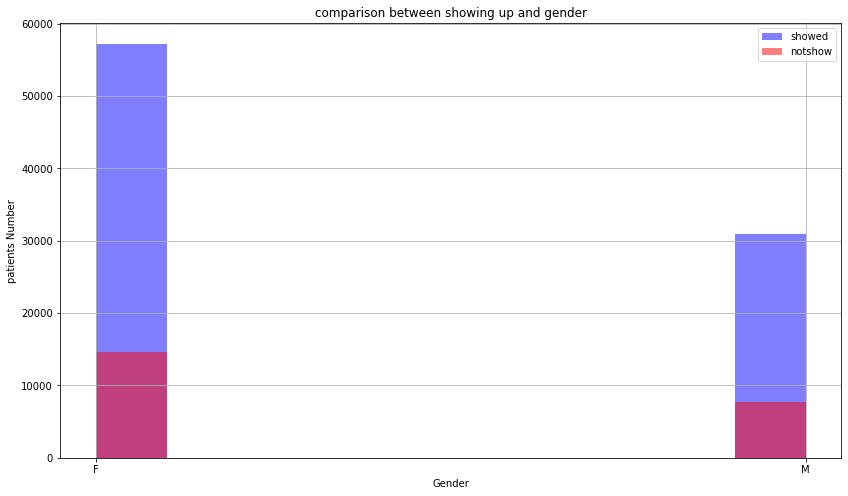

In [25]:
def showing_up(df,col_name,showed,notshowed): #settings
    plt.figure(figsize=[14,8])
    df[col_name][showed].hist(alpha=0.5,bins=10,color='blue',label='showed')
    df[col_name][notshowed].hist(alpha=0.5,bins=10,color='red',label='notshow')
    plt.legend();
    plt.title('comparison between showing up and gender')
    plt.xlabel('Gender')
    plt.ylabel('patients Number');
showing_up(df,'Gender',showed,notshowed)

### Insight:
the gender factor isn't t telling that much, because even though females showed more than males but they are already more females than males in our data.


### Question :Does the day of the week has an impact on respecting the appointement?

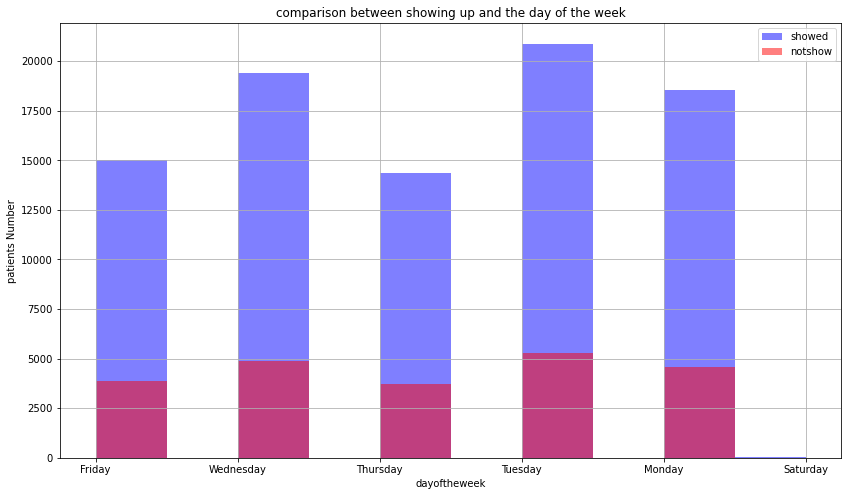

In [26]:
def showing_up(df,col_name,showed,notshowed): #settings
    plt.figure(figsize=[14,8])
    df[col_name][showed].hist(alpha=0.5,bins=10,color='blue',label='showed')
    df[col_name][notshowed].hist(alpha=0.5,bins=10,color='red',label='notshow')
    plt.legend();
    plt.title('comparison between showing up and the day of the week')
    plt.xlabel('dayoftheweek')
    plt.ylabel('patients Number');
showing_up(df,'dayoftheweek',showed,notshowed)

### Insight: 
as we can see the days are pretty much well distributed so, nothing really significant. 

### Question: Does long days waiting has an impact on the appointement show up?

In [27]:
df.waited_days[notshowed].mean() , df.waited_days[showed].mean()

(15.832384963484028, 8.754758692620767)

In [28]:
df.waited_days[notshowed].mean() - df.waited_days[showed].mean()

7.077626270863261

### Insight: 
From the insight above, people who didn't show up waited 7 days more for their appointment. 

For more details about the amount of waited days influencing the decision of showing up to the appointment, I have decided to draw a logistic regression and see if this last has something to say.

In [29]:
# We are going to replace the yes and no in no_show column to 1 and 0.
df = df.replace({'no_show': {'Yes': 1, 
                                'No': 0}})

<AxesSubplot:xlabel='waited_days', ylabel='no_show'>

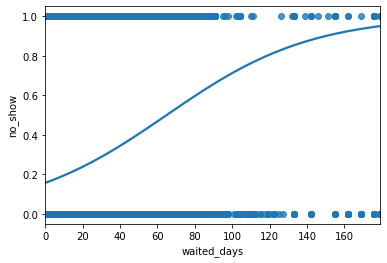

In [30]:
#define the predictor variable and the response variable
x = df['waited_days']
y = df['no_show']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

### Insight: 
We can see clearly that the more days waited for the appointment the more the likelihood of missing it increases.

Above we notice there is a correlation between SMS received and waited days, let's see what the regression is saying.


<AxesSubplot:xlabel='waited_days', ylabel='SMS_received'>

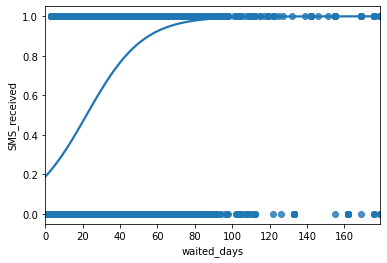

In [31]:
#define the predictor variable and the response variable
x = df['waited_days']
y = df['SMS_received']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

### Insight: 
We can see that the more days go on the more the likelihood of receiving a reminder about your appointment get higher until it hits a likelihood of 100% when for the appointments that have to wait more than 80 days.

### Question: Does the neighbourhood has an impact on respecting the appointement?

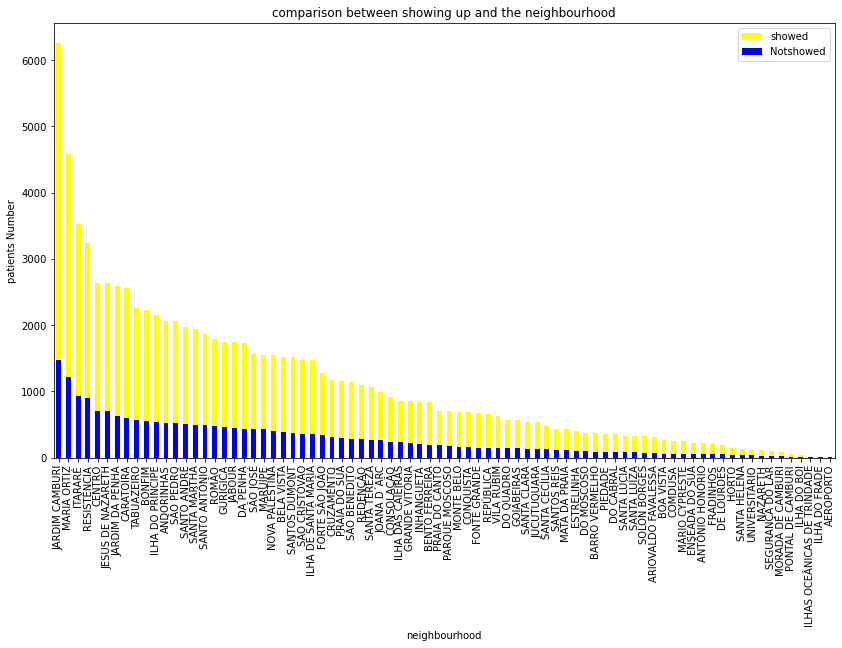

In [32]:
plt.figure(figsize=[14,8])
df.Neighbourhood[showed].value_counts().plot(kind='bar', color='yellow' ,label='showed')
df.Neighbourhood[notshowed].value_counts().plot(kind='bar', color='blue' ,label='Notshowed')
plt.legend()
plt.title('comparison between showing up and the neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('patients Number');

#### Insight: 
well as we can see that the neighbourhood has an effect on attendance and people from jardum camburi are the most who respect there appointement.

<a id='conclusions'></a>
## Conclusions

To be honest, it's really hard to conclude something, because the data at first aren't telling that much and there is no significant correlation between the variables. Still, we can say that the waiting factor has something to do with missing the appointment so, maybe people who had an urgent case had to deal with it and see another option apart from the studied hospital.
### Recommendation:
I do highly recommend that the hospital try to invest more effort in following up on the 20% of no-show cases by calling them directly or by surveys.